In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
X.shape

(506, 13)

In [4]:
Y.shape

(506,)

# Implementing using algorithm


# Train and Test split of data


In [5]:
# Train and Test split of data
#considering standardized as x and price as y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [6]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc1.fit(X_train)
standardised_data_train = sc1.transform(X_train)
standardised_data_test = sc1.transform(X_test)

In [7]:
# Adding a new feature to the data which will contain only ones for ease in computation 
#adding intercept term
additional_feature_train = np.ones(X_train.shape[0])
additional_feature_test = np.ones(X_test.shape[0])

In [8]:
# Matrix having new additional feature X0 which will be multiplied with W0 for the ease of computation
feature_data_train = np.vstack((additional_feature_train,standardised_data_train.T)).T
feature_data_test = np.vstack((additional_feature_test,standardised_data_test.T)).T


In [9]:
# Initialising weight vector
# Generating 14 normally distributed values
weights = np.random.normal(0,1,feature_data_train.shape[1])

# Initialised Weights
weights

array([ 0.28553642, -0.03832597,  2.10071025, -0.36083201, -1.80147075,
       -0.61054967, -0.31259745,  0.73816353, -0.38081003,  1.66704853,
        0.21653888,  0.35430249, -0.06709359,  0.31620857])

In [10]:
X_train.shape[0]
#feature_data_train.shape

354

In [11]:
# Temporary vector to store intermediate computed weight values
temp_w = np.zeros(feature_data_train.shape[1])

# Initialising learning rate
r = 0.001

# Number of training examples
m = X_train.shape[0]

# Code to get batches for Stochastic Gradient Descent
# batch size
batch_size = 20
from numpy import random
random_ids = random.choice(m,m,replace=False)
X_shuffled = feature_data_train[random_ids,:]
y_shuffled = Y_train[random_ids]
mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, m, batch_size)]


# Number of iterations for training the data
iterations = 1000

# SGD
while(iterations >=0):
    for batch in mini_batches:
        X_batch = batch[0]
        Y_batch = batch[1]
        for j in range(0,feature_data_train.shape[1]):
            temp_sum = 0
            for i in range(0,X_batch.shape[0]):
                temp_sum += (( (np.sum( sc1.inverse_transform(weights[1:14] * X_batch[i,1:])) + weights[0]*X_batch[i,0]) - Y_batch[i]) * X_batch[i,j])
            temp_w[j] = weights[j] - ((r/X_batch.shape[0])*temp_sum)
        weights = temp_w
    iterations -= 1 
    
# Weights of manual sgd
manual_sgd_weights = weights

In [12]:
# Now predicting the house prices on X_test data
manual_sgd_predictions = np.zeros(feature_data_test.shape[0])
for itr in range(0,X_test.shape[0]):
    manual_sgd_predictions[itr] = np.sum(sc1.inverse_transform(weights[1:14]*feature_data_test[itr,1:])) + weights[0]*feature_data_test[itr,0]

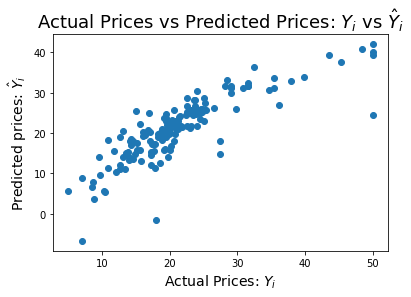

In [13]:
# Plotting the Scatter plot of Actual Price VS Predicted Price
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Y_test, manual_sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

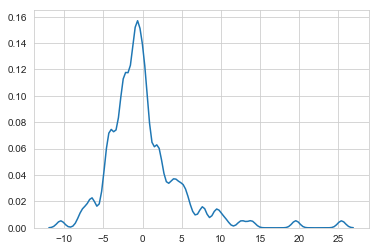

In [14]:
delta_y = Y_test - manual_sgd_predictions;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

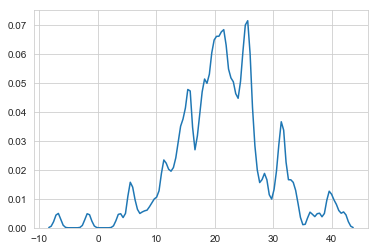

In [15]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(manual_sgd_predictions), bw=0.5)
plt.show()

In [16]:
# Calculating accuracy for Implementation of SGD from Scratch
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Absolute Error for Implementation of SGD from Scratch is : ",mean_absolute_error(Y_test, manual_sgd_predictions))
print("Mean Squared Error for Implementation of SGD from Scratch is : ",mean_squared_error(Y_test, manual_sgd_predictions))
print("Root Mean Squared Error for Implementation of SGD from Scratch is : ",np.sqrt(mean_squared_error(Y_test,manual_sgd_predictions)))

Mean Absolute Error for Implementation of SGD from Scratch is :  3.1829263285527514
Mean Squared Error for Implementation of SGD from Scratch is :  22.21025405262701
Root Mean Squared Error for Implementation of SGD from Scratch is :  4.7127756208657985


In [17]:
#to predict price for some random value of x
#as we have have applied standardization and applied algorithm
x_val=sc1.transform(X[5].reshape(1,-1))
#adding x intercept term
x_val_f=np.column_stack((np.array([1]),x_val))

#predicting price and applying inverse transform on the obtained weights and x values
manual = np.sum(sc1.inverse_transform( weights[1:14] * x_val_f[:,1:] ) )+ weights[0]*x_val_f[:,0] 

print("Predicted value through sklearn algorithm is ", manual)
print("Actual value is ", Y[5])

Predicted value through sklearn algorithm is  [25.46340994]
Actual value is  28.7


# performing SGD using sklearn

In [18]:
# Train and Test split of data
#considering standardized as x and price as y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [19]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
standardised_data_train=sc.transform(x_train)
standardised_data_test=sc.transform(x_test)

In [20]:
#We have considerred the intercept term even for sklearn 

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant',penalty=None, random_state=42)
sgd_reg.fit(standardised_data_train, y_train.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

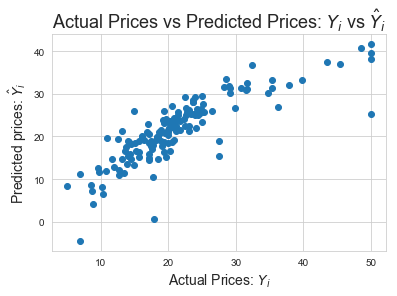

In [21]:
sklearn_sgd_predictions = sgd_reg.predict(standardised_data_test)

# Weights of Sklearn's SGD
sklearn_sgd_intercept=sgd_reg.intercept_
sklearn_sgd_weights = sgd_reg.coef_ 

k=np.hstack((sklearn_sgd_intercept,sklearn_sgd_weights))

plt.scatter(y_test, sklearn_sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

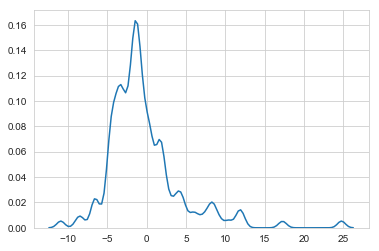

In [22]:
delta_y = y_test - sklearn_sgd_predictions;
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

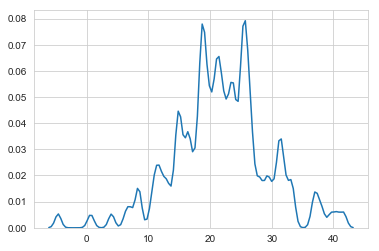

In [23]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(sklearn_sgd_predictions), bw=0.5)
plt.show()

In [24]:
# Calculating accuracy for Implementation of SGD using SKLEARN
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Absolute Error for Implementation of SGD using SKLEARN is : ",mean_absolute_error(y_test,sklearn_sgd_predictions))
print("Mean Squared Error for Implementation of SGD using SKLEARN is : ",mean_squared_error(y_test, sklearn_sgd_predictions))
print("Root Mean Squared Error for Implementation of SGD using SKLEARN is : ",np.sqrt(mean_squared_error(y_test,sklearn_sgd_predictions)))

Mean Absolute Error for Implementation of SGD using SKLEARN is :  3.325801967642559
Mean Squared Error for Implementation of SGD using SKLEARN is :  22.02477227777601
Root Mean Squared Error for Implementation of SGD using SKLEARN is :  4.693055750550595


In [25]:
#to predict price for some random value of x

#as we have have applied standardization and applied algorithm
x_value=sc.transform(X[6].reshape(1,-1))
y_sklearn=sgd_reg.predict(x_value)
print("Predicted value through sklearn algorithm is ", y_sklearn)
print("Actual value is ", Y[6])

Predicted value through sklearn algorithm is  [23.01258264]
Actual value is  22.9


# conclusion

In [26]:
# Creating the table using PrettyTable library
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("Weights of Manual SGD",manual_sgd_weights)
ptable.add_column("Weights of Sklearn's SGD",k)

# Printing the Table
print(ptable)

+-------+-----------------------+--------------------------+
| S.NO. | Weights of Manual SGD | Weights of Sklearn's SGD |
+-------+-----------------------+--------------------------+
|   1   |   -889.4043880680155  |    23.27995981066729     |
|   2   |  -0.12394781837454805 |    -0.920498044349511    |
|   3   |  0.03950355330209016  |    0.9938533583732989    |
|   4   | 0.0017006631674718509 |    0.4434103363721173    |
|   5   |    3.18283932590892   |    0.9671027470419152    |
|   6   |   -6.165937448786177  |   -1.9457948471322701    |
|   7   |   3.9990802038177318  |    2.583479333531989     |
|   8   |  -0.01621445711437064 |   -0.37677058114469736   |
|   9   |  -1.2547344085310053  |    -2.73541117101303     |
|   10  |  0.21283720173699222  |    2.1532987227492457    |
|   11  | -0.008532123742092054 |   -1.2842792151481786    |
|   12  |  -0.7860473167980413  |   -1.7385969639394139    |
|   13  |  0.012805688952166158 |    1.552001233518805     |
|   14  |  -0.5687857745

Observation
While comparing scikit-learn implemented SGD and explicitly implemented linear regression using optimization algorithm(sgd) in python we see there are not much differences between both of them but sklearn performs well over implemented SGD.

Overall we can say the regression line not fits data perfectly but our prediction line can be assumed as it is close to actual. But strictly speaking our goal is to find the line/plane that best fits our datawhich means minimal error i.e. mse should be close to 0.


Method  Followed 

Implementing manual algorithm
1) divided the data into train and split
2) applying standard scaling on train data
3) adding intercept term to X values
4) applying manual algorithm to find the weights since it is (13 col+ 1 intercept col) we get  total of 14
5) finding out the optimal weights using algorithm 
6) Doing inverse transform of scaling values and doing product of weights and x values,clearly performed in predicting the price

Implementing sklearn algorithm

1) splitting data into train and test
2) applying standard scaling on train data
3)applying algorithm
4) predicting price values using predict method 